<a href="https://colab.research.google.com/github/jasminjahanpuspo/CNN_Architectures_Template/blob/main/BC_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color='yellow'>Model Name: MobileNet</font>**
##**Date: 21<sup>st</sup>January 2020**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####**Import Necessary Library**

In [2]:
import numpy as np
import cv2
import os
import pandas as pd

import glob as gb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU

####**Define directories path**

In [4]:
## Define the directories for training, testing, and validation
train_directory = '/content/drive/MyDrive/MIAS/train'
test_directory = '/content/drive/MyDrive/MIAS/test'
valid_directory = '/content/drive/MyDrive/MIAS/val'

####**Create dataset function using keras/Tensorflow**

In [5]:
IMG_SIZE = (224, 224)  # define resolution (299,299) /(224,224)
BATCH_SIZE = 128       # varies from dataset to datset prefferable 128/68/32

In [6]:
# Create TensorFlow datasets for training, testing, and validation
#you can customize parameters as per dataset
train_dataset = image_dataset_from_directory(
    train_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

test_dataset = image_dataset_from_directory(
    test_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

valid_dataset = image_dataset_from_directory(
    valid_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

Found 3294 files belonging to 2 classes.
Found 573 files belonging to 2 classes.
Found 573 files belonging to 2 classes.


In [7]:
# Optional: You can also specify the class names if you have a specific order for your classes
class_names = train_dataset.class_names

# Print class names
print("Class Names:", class_names)

Class Names: ['benign', 'malignant']


In [ ]:
#plot bar chart for demonstrating data size
sns.set_theme(style="whitegrid")
Dataset = []
for folder in os.listdir(train_directory):
    files = gb.glob(pathname=str(train_directory + "/" + folder +"/*.*"))
    Dataset.append(len(files))
plt.figure(figsize=(13,7))                    ## change the len size
sns.barplot(x=[ "0","1"], y=Dataset, palette="rocket")  ## change the class name
plt.show()

<ipython-input-8-f6b6275daa78>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=Dataset, palette="rocket")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


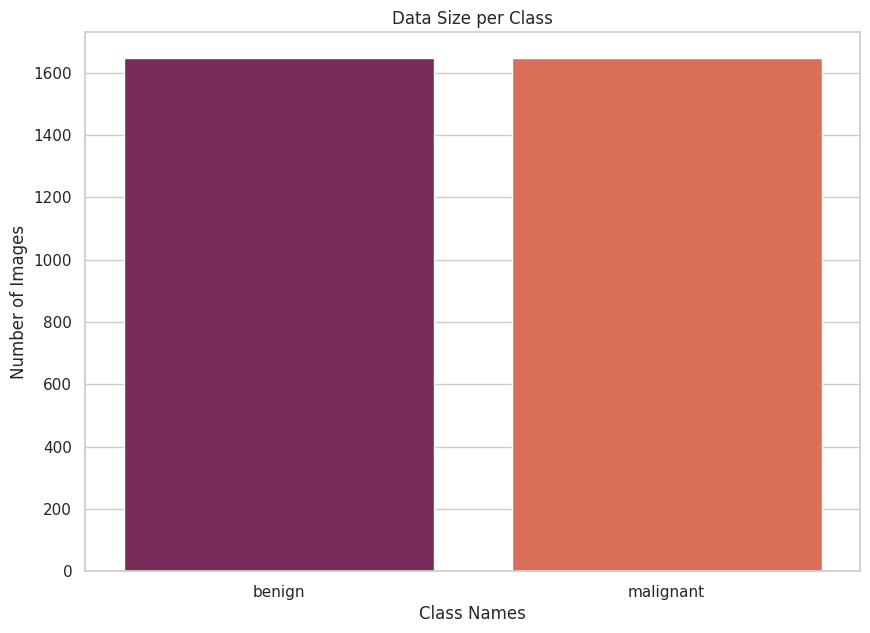

In [8]:
# Set the theme for the plot
sns.set_theme(style="whitegrid")

# Initialize the dataset size list and class names
Dataset = []
class_names = []#train_directory = '/path/to/your/train/dataset'  # Replace with your dataset directory

# Loop through each folder (representing classes) and count the files in each folder
for folder in os.listdir(train_directory):
    folder_path = os.path.join(train_directory, folder)
    if os.path.isdir(folder_path):
        files = gb.glob(pathname=str(folder_path + "/*.*"))  # Get all files in the class folder
        Dataset.append(len(files))  # Add the number of files to the Dataset list
        class_names.append(folder)  # Add the class name (folder name) to the class_names list

# Make figure size dynamic based on number of classes (e.g., width grows with class count)
num_classes = len(class_names)
width = max(10, num_classes * 1.5)  # Base width on number of classes, with a minimum of 10

plt.figure(figsize=(width, 7))  # Height remains constant, width changes dynamically

# Plot the bar chart
sns.barplot(x=class_names, y=Dataset, palette="rocket")
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Data Size per Class')
plt.show()

## <font color='blue'>Build the Model</font>

In [9]:
base_learning_rate = 0.001 # prefferable lr is 0.0001 or 0.001
IMG_SHAPE = IMG_SIZE +(3,)

In [10]:
# For MobileNetV3 Small
base_model = tf.keras.applications.MobileNetV3Small(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

# For MobileNetV3 Large (uncomment if you want to use this version)
# base_model = tf.keras.applications.MobileNetV3Large(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')


In [11]:
# Preprocess input function for MobileNetV3
preprocess_input = tf.keras.applications.mobilenet_v3.preprocess_input

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Preprocess input function for MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


In [ ]:
# Preprocess input function for MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


In [ ]:
# Optionally, you can load a different variant of MobileNet, such as MobileNetV3
# Uncomment the line below to use MobileNetV3
# downloaded_model = tf.keras.applications.MobileNetV3Small(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

# Alternatively, if you want to use MobileNetV2 as a downloaded model
downloaded_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')


In [ ]:
# Preprocess input function for MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

type(base_model)
## N.B: changle the model name
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

In [12]:
nb_layers = len(base_model.layers)
print("Numbers of Layers =" , nb_layers)
print(base_model.layers[nb_layers - 2].name)  # pre- Last name
print(base_model.layers[nb_layers - 1].name)

Numbers of Layers = 229
tf.math.multiply_26
multiply_17


In [13]:
# iterate over first batch (32 image) in trainset
image_batch, label_batch = next(iter(train_dataset))  # 32 image arrays
feature_batch = base_model(image_batch)  # run the model on those 32 image (base model with its 1000 causes classification)
print(feature_batch.shape)  # 32 for number of images in this batch and 1000 for classes

(128, 7, 7, 576)


In [14]:
def create_model( image_shape=IMG_SHAPE):
    ''' Define a tf.keras model for multi-class classification out of the *model name* (Resnet/Inception...) '''
    ##change the *model name*
    #downloaded_model = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE, include_top= False, weights='imagenet')
    downloaded_model = tf.keras.applications.MobileNetV3Small(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
    downloaded_model.trainable = True
    for layer in downloaded_model.layers[0 : 291]:
        layer.trainable = False

    inputs = tf.keras.Input(image_shape)
    x = preprocess_input(inputs)
    x = downloaded_model(x , training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    prediction_layer = tf.keras.layers.Dense(7 ,activation = "softmax")   ## change the first parameter according to the class len
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)
    model.summary()
    return model

In [15]:
## specify function name as model name
model = create_model(IMG_SHAPE)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 576)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 7)                 4039      
                                                                 
Total params: 943159 (3.60 MB)
Trainable params: 4039 (15.78 

In [16]:
## customize optimizer as Nadam or Adam
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=base_learning_rate),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
## set the path name as *dataset/Lr/optimizer_name/model_name*
model_filepath="/content/drive/MyDrive/MIAS/BC_Code/MobileNetv3/mobilenetv3-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath = model_filepath ,
    monitor ='val_accuracy',
    mode = 'max' ,
    save_best_only =True ,
    verbose = 1
)

###**Weight Initialization**

In [ ]:
#avoid random weight initialization do automatic if you can

total = 0
for i in range(0,len(Dataset )) :
    total +=Dataset [i]

weight_for_0 = (1 / Dataset [0]) * (total / 2.0)
weight_for_1 = (1 / Dataset [1]) * (total / 2.0)


class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

In [18]:
import numpy as np

# Example dataset with class distribution (replace with your actual dataset class counts)
#Dataset = np.array([100, 200, 150, 50])  # Example: 100 samples for class 0, 200 for class 1, 150 for class 2, 50 for class 3

# Calculate total number of samples in the dataset
total = np.sum(Dataset)

# Initialize an empty dictionary to hold the weights
class_weight = {}

# Dynamically calculate the weight for each class
for i in range(len(Dataset)):
    class_weight[i] = (total / (len(Dataset) * Dataset[i]))

# Print the computed weights for each class
for class_id, weight in class_weight.items():
    print(f'Weight for class {class_id}: {weight:.2f}')

# Output the class weights dictionary
print(class_weight)


Weight for class 0: 1.00
Weight for class 1: 1.00
{0: 1.0, 1: 1.0}


In [19]:
## change hyperparameter such as epoches
history = model.fit(train_dataset , verbose=2 , epochs=30 , class_weight=class_weight ,
                               validation_data=valid_dataset , use_multiprocessing= True, callbacks =[checkpoint])

Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.45550, saving model to /content/drive/MyDrive/MIAS/BC_Code/MobileNetv3/mobilenetv3-01-0.4555.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 - 31s - loss: 1.2957 - accuracy: 0.4320 - val_loss: 0.7781 - val_accuracy: 0.4555 - 31s/epoch - 1s/step
Epoch 2/30

Epoch 2: val_accuracy improved from 0.45550 to 0.57941, saving model to /content/drive/MyDrive/MIAS/BC_Code/MobileNetv3/mobilenetv3-02-0.5794.hdf5
26/26 - 12s - loss: 0.8341 - accuracy: 0.5513 - val_loss: 0.6971 - val_accuracy: 0.5794 - 12s/epoch - 459ms/step
Epoch 3/30

Epoch 3: val_accuracy improved from 0.57941 to 0.64398, saving model to /content/drive/MyDrive/MIAS/BC_Code/MobileNetv3/mobilenetv3-03-0.6440.hdf5
26/26 - 12s - loss: 0.7135 - accuracy: 0.6075 - val_loss: 0.6494 - val_accuracy: 0.6440 - 12s/epoch - 467ms/step
Epoch 4/30

Epoch 4: val_accuracy improved from 0.64398 to 0.67888, saving model to /content/drive/MyDrive/MIAS/BC_Code/MobileNetv3/mobilenetv3-04-0.6789.hdf5
26/26 - 12s - loss: 0.6476 - accuracy: 0.6570 - val_loss: 0.6191 - val_accuracy: 0.6789 - 12s/epoch - 471ms/step
Epoch 5/30

Epoch 5: val_accuracy improved from 0.67888 to 0.69110, saving

###**Model evaluating on Test dataset**

In [20]:
model.evaluate(test_dataset , verbose = 1)

5/5 [==============================] - 5s 207ms/step - loss: 0.4496 - accuracy: 0.7906


[0.44957783818244934, 0.7905759215354919]

1/1 [==============================] - 0s 36ms/step


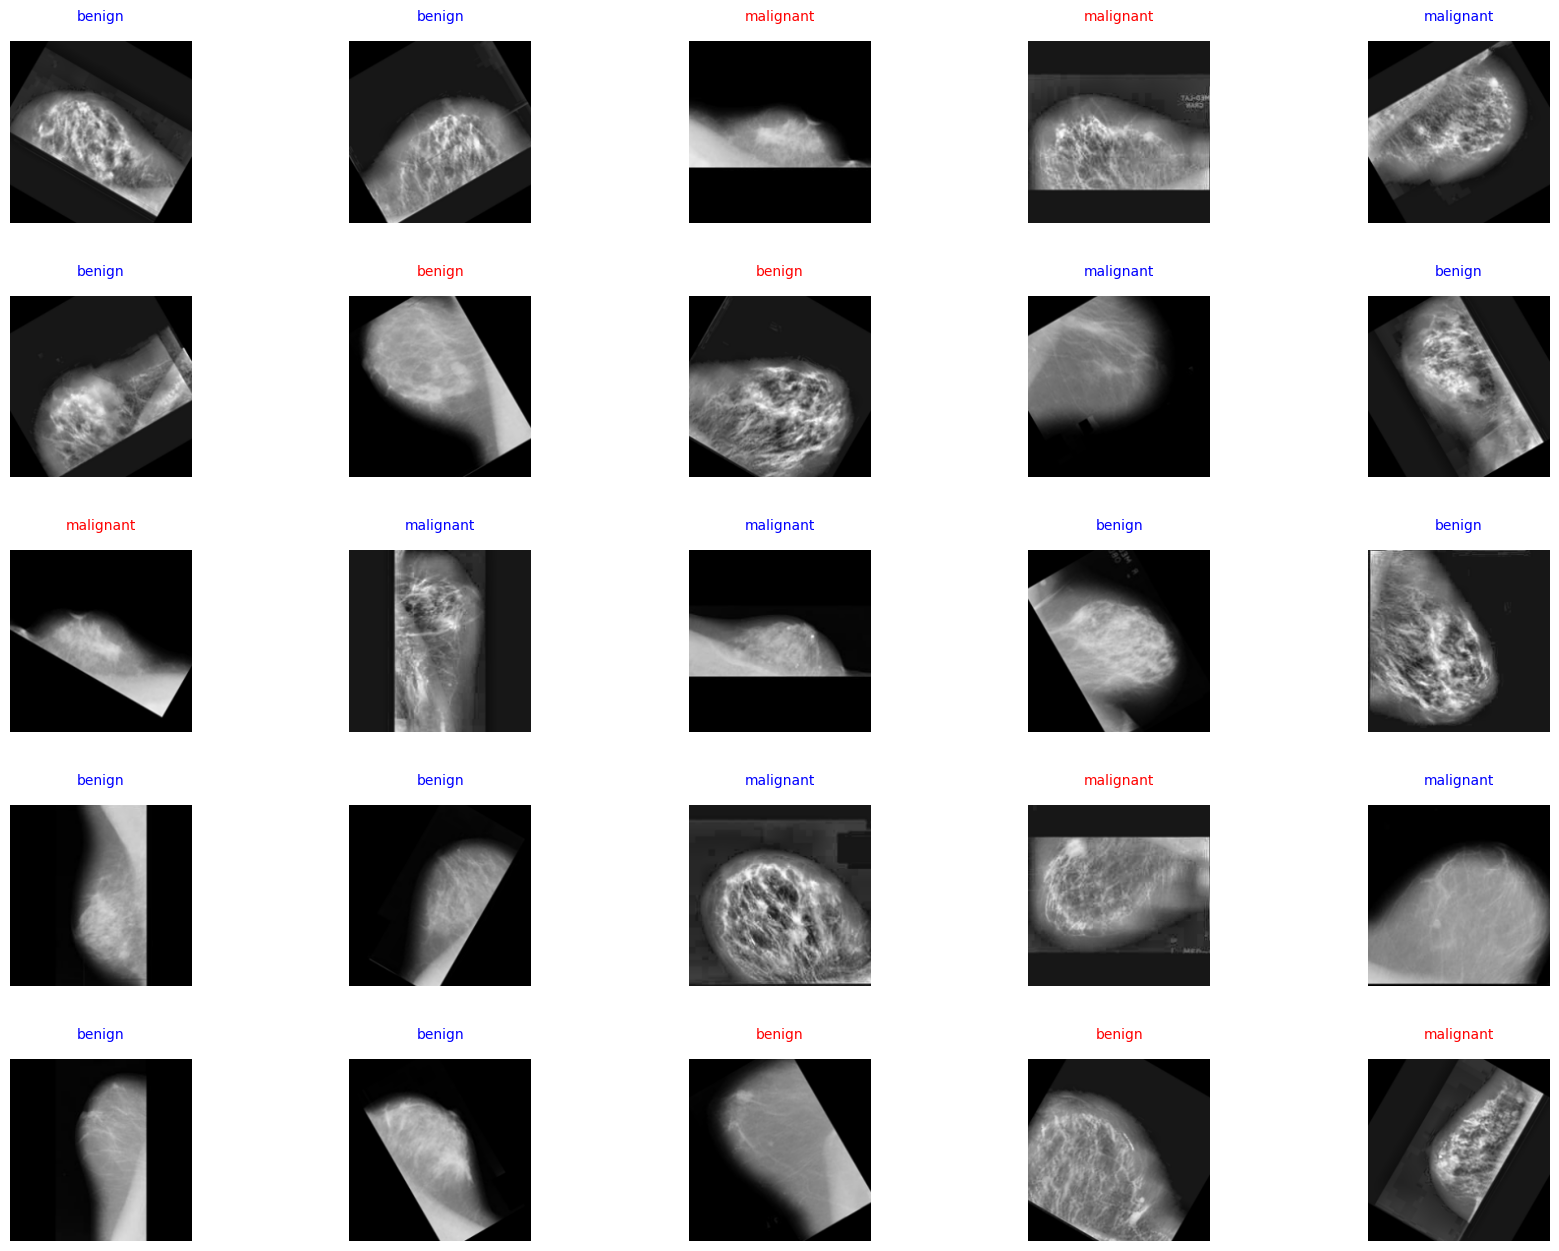

In [21]:
plt.figure(figsize=(20, 15))
for images, labels in test_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = model.predict(img2)
        predicted= class_names[np.argmax(predict)]
        actual = class_names [labels[i].numpy().astype("uint8")]
        if (actual == predicted):
            plt.title(predicted, fontsize=10, color= 'blue', pad=15);
        else :
            plt.title(actual, fontsize=10, color= 'red' ,pad=15);
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,
                            top=0.9, wspace=0.4,hspace=0.4)

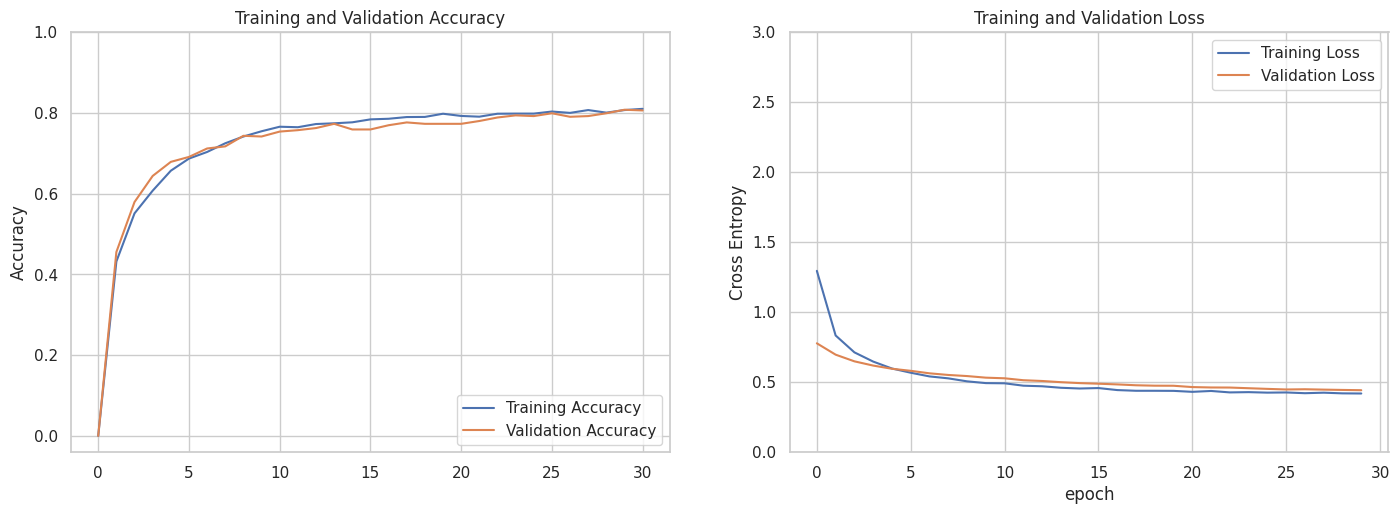

In [22]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

###**True and Predicted labels**

In [23]:
from sklearn.preprocessing import label_binarize

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and make predictions
for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Binarize the true and predicted labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predicted_labels_bin = label_binarize(predicted_labels, classes=np.unique(predicted_labels))

2/2 [==============================] - 1s 53ms/step


###**Classification Report**

In [24]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print(report)

              precision    recall  f1-score   support

      benign       0.81      0.87      0.84       357
   malignant       0.75      0.67      0.71       216

    accuracy                           0.79       573
   macro avg       0.78      0.77      0.77       573
weighted avg       0.79      0.79      0.79       573



###**ROC Curve for Multiclass Classification**

2/2 [==============================] - 0s 57ms/step


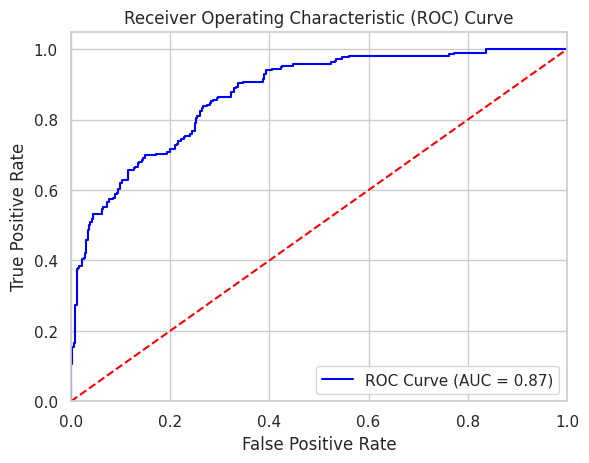

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'model' is your trained model and 'test_dataset' is your test data
predicted_probs = []
true_labels = []
for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_probs.extend(predictions) # Assuming your model outputs probabilities
    true_labels.extend(labels.numpy())

# Ensure predicted_probs are probabilities for the positive class
if len(predicted_probs[0]) > 1:
    predicted_probs = np.array(predicted_probs)[:, 1] # Assuming binary classification

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)

# Calculate AUC
auc = roc_auc_score(true_labels, predicted_probs)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### **Confusion Matrix**

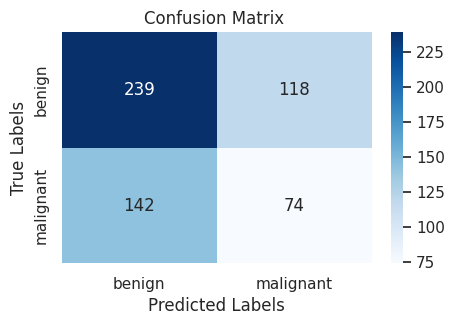

In [26]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
## change the model name
plt.title('Confusion Matrix ')
plt.show()

###**Cohen's Kappa**

In [27]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(true_labels, predicted_labels)
print(f'Cohen\'s Kappa: {kappa:.4f}')

Cohen's Kappa: 0.0123


###**Matthews Correlation Coefficient (MCC)**

In [28]:
from sklearn.metrics import matthews_corrcoef
import numpy as np

# Assuming true_labels and predicted_labels are multiclass labels
mcc_values = [matthews_corrcoef(true_labels == i, predicted_labels == i) for i in np.unique(true_labels)]

average_mcc = np.mean(mcc_values)
print(f'Average Matthews Correlation Coefficient for Multiclass: {average_mcc:.4f}')

Average Matthews Correlation Coefficient for Multiclass: 0.0124


###**Right Wrong Prediction**

Total Right Predictions: 313
Total Wrong Predictions: 260
Wrong Prediction Percentage: 45.38%


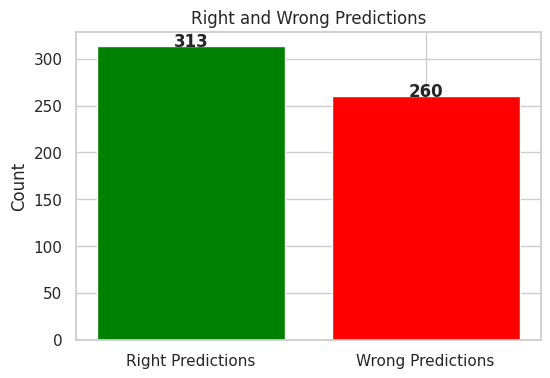

In [29]:
# Calculate total right and wrong predictions
total_right = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
total_wrong = sum(1 for true, pred in zip(true_labels, predicted_labels) if true != pred)
total_samples = len(true_labels)

# Calculate wrong prediction percentage
wrong_prediction_percentage = (total_wrong / total_samples) * 100

print("Total Right Predictions:", total_right)
print("Total Wrong Predictions:", total_wrong)
print("Wrong Prediction Percentage: {:.2f}%".format(wrong_prediction_percentage))


# Prepare data for plotting
categories = ['Right Predictions', 'Wrong Predictions']
values = [total_right, total_wrong]

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(categories, values, color=['green', 'red'])
plt.ylabel('Count')
plt.title('Right and Wrong Predictions')

# Show counts on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

plt.show()

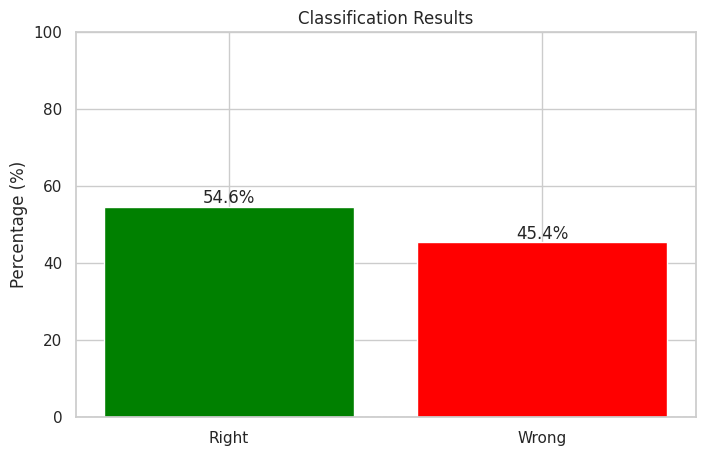

In [30]:
# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
TN, FP, FN, TP = cm.ravel()

# Right and wrong classifications
right_classifications = TP + TN
wrong_classifications = FP + FN

# Calculate percentages
total = right_classifications + wrong_classifications
right_percentage = (right_classifications / total) * 100
wrong_percentage = (wrong_classifications / total) * 100

# Data for the bar plot
labels = ['Right', 'Wrong']
percentages = [right_percentage, wrong_percentage]


# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, percentages, color=['green', 'red'])

# Add percentage labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%',
             ha='center', va='bottom')  # va: vertical alignment

# Add titles and labels
plt.title('Classification Results')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Optional: Add a horizontal line at y=0

# Show the plot
plt.show()

###**Misclassified Images**

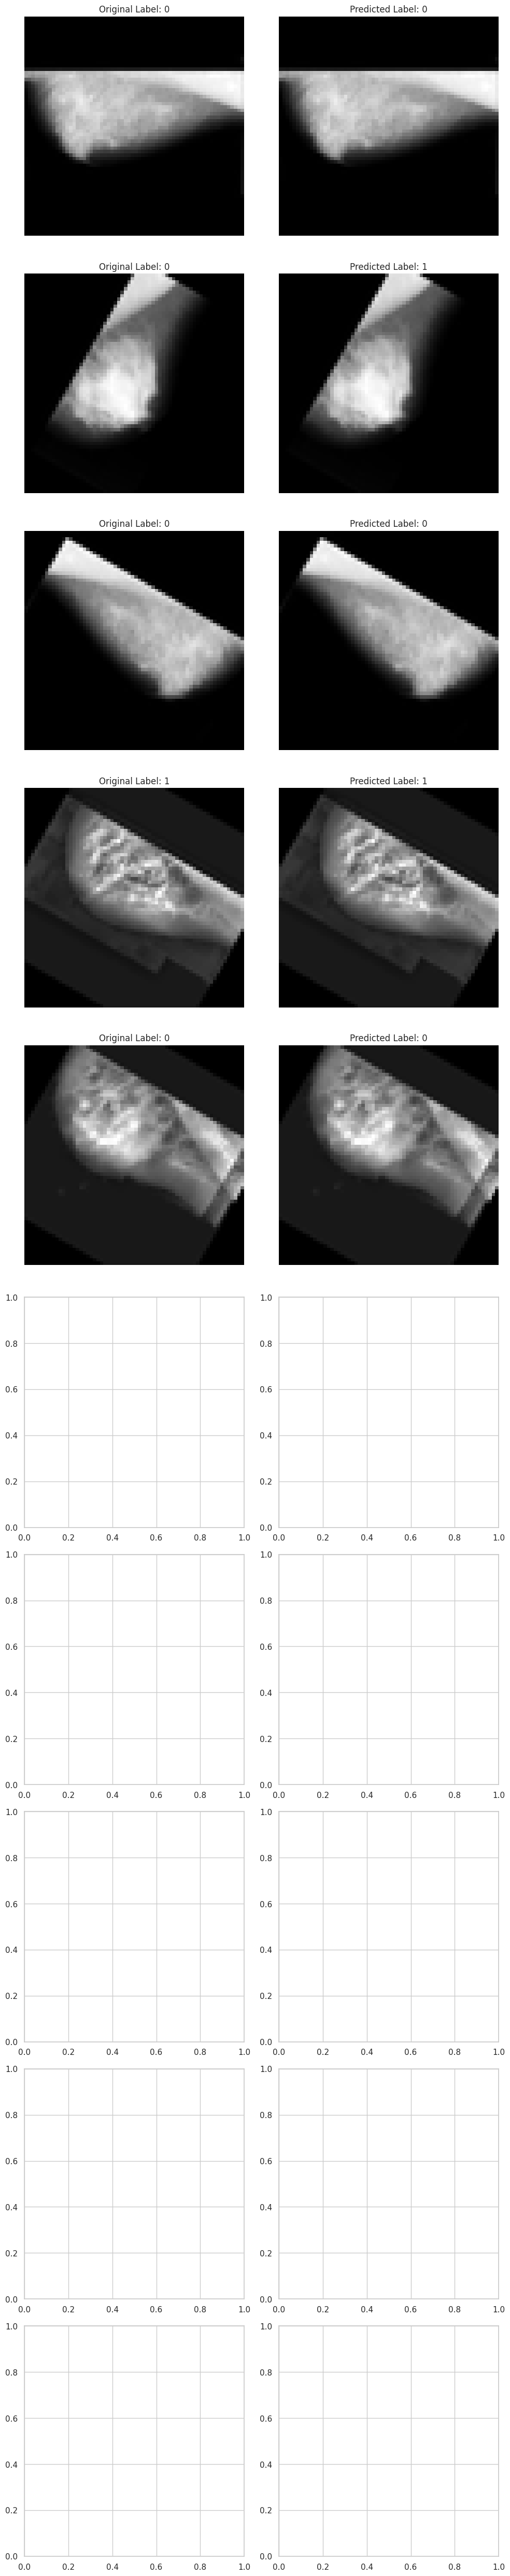

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

# Function to load a specified number of random images from subfolders
def load_random_images_from_subfolders(folder, num_images=10):
    images = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            image_files = os.listdir(subfolder_path)
            # Randomly select images from this subfolder
            selected_files = random.sample(image_files, min(num_images, len(image_files)))
            for image_file in selected_files:
                img_path = os.path.join(subfolder_path, image_file)
                img = Image.open(img_path)
                img = img.resize((64, 64))  # Resize to a consistent size if necessary
                images.append(np.array(img) / 255.0)  # Normalize pixel values
                if len(images) >= num_images:  # Stop if we have loaded enough images
                    return np.array(images)
    return np.array(images)

# Set the path to your test folder
test_folder = '/content/drive/MyDrive/MIAS/test'  # Folder containing subfolders of images

# Load a few random images from subfolders (up to 10)
images = load_random_images_from_subfolders(test_folder, num_images=5)

# Assuming you already have true and predicted labels loaded
# Replace these with your actual arrays
true_labels = true_labels  # Example true labels
predicted_labels = predicted_labels # Example predicted labels

# Set up the plot
cols = 2  # Two columns: original and predicted
rows = 10  # One row for each image

fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * 10))

# Loop through and display images
for i in range(len(images)):
    original_image = images[i]
    predicted_label = predicted_labels[i]
    true_label = true_labels[i]

    # Plot original image
    axes[i, 0].imshow(original_image, cmap='gray')
    axes[i, 0].set_title(f'Original Label: {true_label}')
    axes[i, 0].axis('off')

    # Plot predicted image (optionally the same image)
    axes[i, 1].imshow(original_image, cmap='gray')
    axes[i, 1].set_title(f'Predicted Label: {predicted_label}')
    axes[i, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


###**Specificity Sensitivity**

Sensitivity: 0.34
Specificity: 0.67


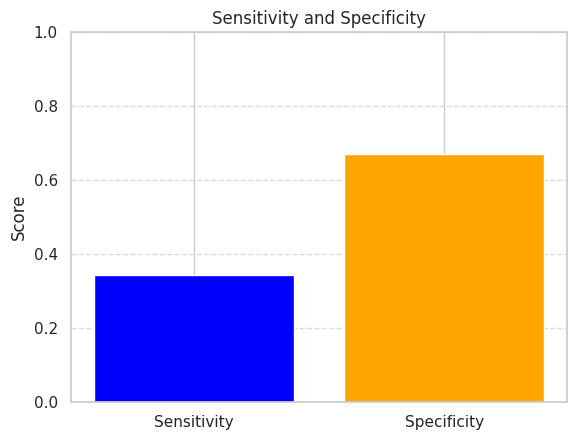

In [32]:
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

# Calculate sensitivity, specificity, and Jaccard index
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print the results
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

# Metrics for plotting
metrics = [sensitivity, specificity]
labels = ['Sensitivity', 'Specificity']

# Create bar plot
plt.bar(labels, metrics, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.ylabel('Score')
plt.title('Sensitivity and Specificity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

###**Jaccard Index Dice Score**

Jaccard Index: 0.22
Dice Score: 0.36


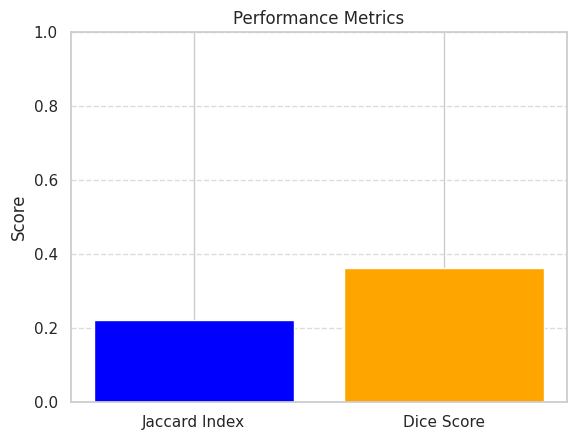

In [33]:
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

# Calculate Jaccard Index
jaccard_index = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0

# Calculate Dice Score
dice_score = (2 * tp) / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0

# Print results
print(f"Jaccard Index: {jaccard_index:.2f}")
print(f"Dice Score: {dice_score:.2f}")

# Metrics for plotting
metrics = [jaccard_index, dice_score]
labels = ['Jaccard Index', 'Dice Score']

# Create bar plot
plt.bar(labels, metrics, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

###**Bar Plot**

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score

# Example true labels and predicted labels


# Calculate confusion matrix components
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0

# AUC-ROC calculation
# Ensure predicted probabilities are available if needed
# For binary classification with predicted labels as 0 and 1, we can use predicted_labels directly for AUC
# If you have probabilities instead, use that instead
# predicted_probabilities = model.predict_proba(X_test)[:, 1]  # Example for getting probabilities
# auc_roc = roc_auc_score(true_labels, predicted_probabilities)
auc_roc = roc_auc_score(true_labels, predicted_labels)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")


Accuracy: 0.5462
Precision: 0.3854
Recall: 0.3426
F1 Score: 0.3627
Negative Predictive Value (NPV): 0.6273
AUC-ROC: 0.5060


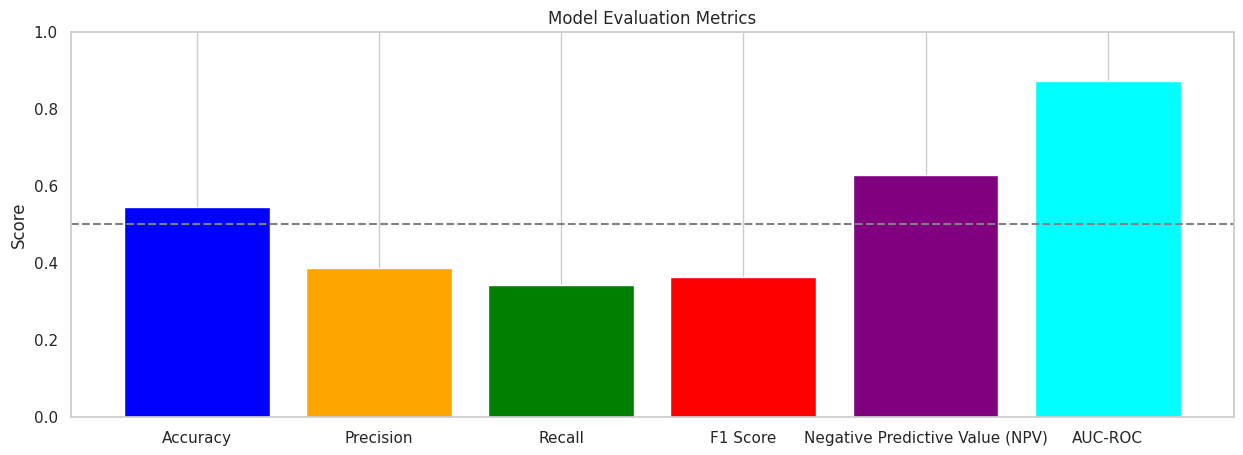

In [36]:
# Store metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Negative Predictive Value (NPV)': npv,
    'AUC-ROC': auc
}

# Plotting the metrics
plt.figure(figsize=(15, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.axhline(y=0.5, color='grey', linestyle='--')  # Reference line at 0.5
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Metrics calculated manually
metrics = {
    'Accuracy': 0.9825,
    'Precision': 0.9558,
    'Recall':  1.0000,
    'F1 Score': 0.9774,
    'NPV': 1.0000,
    'AUC-ROC': 0.9860,
}

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'yellow'])

# Adding titles and labels
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for clarity
plt.axhline(y=0.5, color='gray', linestyle='--')  # Add a horizontal line at 0.5 for reference



plt.tight_layout()
plt.show()

In [37]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')


9406464/9406464 [==============================] - 0s 0us/step


In [38]:
# Preprocess input function for MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

type(base_model)
## N.B: changle the model name
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

In [39]:
nb_layers = len(base_model.layers)
print("Numbers of Layers =" , nb_layers)
print(base_model.layers[nb_layers - 2].name)  # pre- Last name
print(base_model.layers[nb_layers - 1].name)

Numbers of Layers = 154
Conv_1_bn
out_relu


In [40]:
# iterate over first batch (32 image) in trainset
image_batch, label_batch = next(iter(train_dataset))  # 32 image arrays
feature_batch = base_model(image_batch)  # run the model on those 32 image (base model with its 1000 causes classification)
print(feature_batch.shape)  # 32 for number of images in this batch and 1000 for classes

(128, 7, 7, 1280)


In [41]:
def create_model( image_shape=IMG_SHAPE):
    ''' Define a tf.keras model for multi-class classification out of the *model name* (Resnet/Inception...) '''
    ##change the *model name*
    downloaded_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
    downloaded_model.trainable = True
    for layer in downloaded_model.layers[0 : 291]:
        layer.trainable = False

    inputs = tf.keras.Input(image_shape)
    x = preprocess_input(inputs)
    x = downloaded_model(x , training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    prediction_layer = tf.keras.layers.Dense(7 ,activation = "softmax")   ## change the first parameter according to the class len
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)
    model.summary()
    return model

In [42]:
## specify function name as model name
model = create_model(IMG_SHAPE)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 7)                 8967      
                                                                 
Total params: 2266951 (8.65 MB)
Trainable params: 8967 (35.

In [43]:
## customize optimizer as Nadam or Adam
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=base_learning_rate),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

In [44]:
from tensorflow.keras.callbacks import ModelCheckpoint
## set the path name as *dataset/Lr/optimizer_name/model_name*
model_filepath="/content/drive/MyDrive/MIAS/BC_Code/MobileNetv2/mobilenetv2-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath = model_filepath ,
    monitor ='val_accuracy',
    mode = 'max' ,
    save_best_only =True ,
    verbose = 1
)

In [45]:
## change hyperparameter such as epoches
history = model.fit(train_dataset , verbose=2 , epochs=50 , class_weight=class_weight ,
                               validation_data=valid_dataset , use_multiprocessing= True, callbacks =[checkpoint])

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.57417, saving model to /content/drive/MyDrive/MIAS/BC_Code/MobileNetv2/mobilenetv2-01-0.5742.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 - 34s - loss: 1.1883 - accuracy: 0.4706 - val_loss: 0.6807 - val_accuracy: 0.5742 - 34s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.57417 to 0.59860, saving model to /content/drive/MyDrive/MIAS/BC_Code/MobileNetv2/mobilenetv2-02-0.5986.hdf5
26/26 - 30s - loss: 0.8055 - accuracy: 0.5941 - val_loss: 0.6890 - val_accuracy: 0.5986 - 30s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.59860 to 0.64049, saving model to /content/drive/MyDrive/MIAS/BC_Code/MobileNetv2/mobilenetv2-03-0.6405.hdf5
26/26 - 30s - loss: 0.6902 - accuracy: 0.6503 - val_loss: 0.6536 - val_accuracy: 0.6405 - 30s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.64049 to 0.65096, saving model to /content/drive/MyDrive/MIAS/BC_Code/MobileNetv2/mobilenetv2-04-0.6510.hdf5
26/26 - 30s - loss: 0.6272 - accuracy: 0.6721 - val_loss: 0.6431 - val_accuracy: 0.6510 - 30s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.65096 to 0.65969, saving model to

KeyboardInterrupt: 